In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("traindata_rfe.csv")
test = pd.read_csv("testdata_rfe.csv")

/var/folders/ls/8gbvtyrd07g59v3ct9lcsmm00000gn/T/ipykernel_12158/2738918831.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("traindata_rfe.csv")


In [3]:
train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right,label,transcript_id,gene_id
0,244,125.913514,4.386989,6.650,126.0,3.440,1.843025,4.944365,3.302671,2.765244,2.906225,2.522168,1,4,16,0,ENST00000000233,ENSG00000004059
1,261,107.889535,3.016599,3.000,108.0,2.660,1.689167,2.981182,1.237045,3.526528,1.466295,2.492530,6,2,10,0,ENST00000000233,ENSG00000004059
2,316,98.947027,2.087146,3.780,99.5,1.910,1.311103,1.492577,0.893481,3.203816,0.800496,1.484341,12,0,2,0,ENST00000000233,ENSG00000004059
3,332,97.836500,2.236520,2.635,97.5,2.135,2.459317,3.202963,1.393868,1.928009,0.741771,3.494937,2,6,3,0,ENST00000000233,ENSG00000004059
4,368,121.954545,4.260253,5.660,122.0,4.160,2.743228,2.664643,1.753894,2.177236,1.341822,2.379045,3,9,12,0,ENST00000000233,ENSG00000004059


In [4]:
test.head()

,transcript_id,transcript_position,gene_id,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,label,seq_left,seq_center,seq_right
0,ENST00000005257,470,ENSG00000006451,121.032258,2.513839,9.26,121.0,2.390,3.070013,4.203054,1.736880,3.126204,0.869722,1.267762,0,11,17,21
1,ENST00000005257,504,ENSG00000006451,126.029412,2.674206,4.92,126.0,2.315,1.562898,2.673237,1.436917,2.345023,1.113461,1.576460,0,3,11,20
2,ENST00000005257,525,ENSG00000006451,125.387097,3.073226,6.15,126.0,2.880,1.130465,3.727447,2.105785,2.611110,1.273123,2.040985,0,7,3,14
3,ENST00000005257,600,ENSG00000006451,122.606061,3.255455,5.94,122.0,3.030,2.399447,2.938300,2.782057,3.311499,1.286042,1.975153,0,3,11,20
4,ENST00000005257,696,ENSG00000006451,121.965517,3.116897,7.81,122.0,2.820,1.898227,3.906871,2.458343,3.537803,1.348092,1.171399,0,11,17,23


In [5]:
X_train = train.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_train = train['label']
X_test = test.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_test = test['label']

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.1)

Epoch 1/10
5272/5272 [==============================] - 9s 1ms/step - loss: 1.7058 - accuracy: 0.6466 - val_loss: 0.1248 - val_accuracy: 0.9427
Epoch 2/10
5272/5272 [==============================] - 7s 1ms/step - loss: 1.1415 - accuracy: 0.7008 - val_loss: 0.5969 - val_accuracy: 0.8229
Epoch 3/10
5272/5272 [==============================] - 7s 1ms/step - loss: 0.8462 - accuracy: 0.7226 - val_loss: 1.1340 - val_accuracy: 0.5724
Epoch 4/10
5272/5272 [==============================] - 8s 1ms/step - loss: 0.6789 - accuracy: 0.7375 - val_loss: 0.2723 - val_accuracy: 0.8980
Epoch 5/10
5272/5272 [==============================] - 7s 1ms/step - loss: 0.5815 - accuracy: 0.7525 - val_loss: 0.2784 - val_accuracy: 0.9003
Epoch 6/10
5272/5272 [==============================] - 7s 1ms/step - loss: 0.5299 - accuracy: 0.7690 - val_loss: 0.9265 - val_accuracy: 0.5565
Epoch 7/10
5272/5272 [==============================] - 6s 1ms/step - loss: 0.4872 - accuracy: 0.7828 - val_loss: 0.4042 - val_accuracy:

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

745/745 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8439
Test Accuracy: 84.39%


In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 

print(classification_report(y_test, y_pred_classes))


745/745 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     22648
           1       0.19      0.68      0.30      1184

    accuracy                           0.84     23832
   macro avg       0.59      0.76      0.61     23832
weighted avg       0.94      0.84      0.88     23832



745/745 [==============================] - 1s 1ms/step


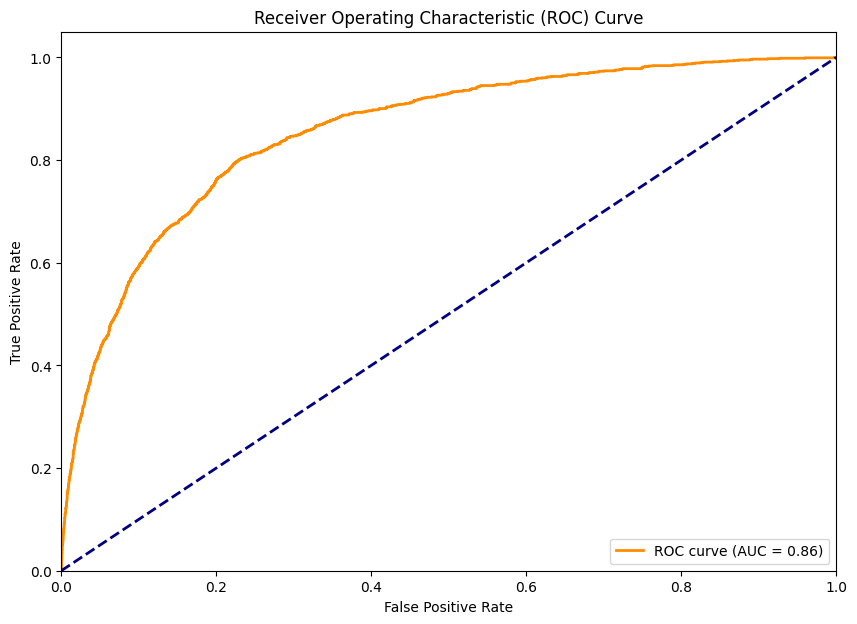

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test).ravel()  # Get predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
